In [1]:
### Use this notebook after running trace_merge_script 
### to quickly explore the traces (i.e. before moving to
### dropbox-based analysis on the non-processing computer).

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
# %pdb

import os
from IPython.core.debugger import set_trace
from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np
import time
import scipy.stats

import h5py
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import consensus_score


import cosmos.traces.trace_analysis_utils as utils
from cosmos.behavior.bpod_dataset import BpodDataset
import cosmos.imaging.atlas_registration as reg
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.traces.cosmos_traces import CosmosTraces

import trace_merge_params as params 


/home/user/anaconda3/envs/cosmos3_11/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%pdb

Automatic pdb calling has been turned ON


In [4]:
    
workstation = 'cosmosdata' #'analysis2'
if workstation == 'analysis2':
    data_dir = '/home/izkula/Data/processedData/'
    fig_save_dir = '/home/izkula/Dropbox/cosmos/trace_analysis/'
    bpod_dir = ''
elif workstation == 'cosmosdata':
    data_dir = '/hdd1/Data/processedData/'
    fig_save_dir = '/home/user/Dropbox/cosmos/trace_analysis/'
    bpod_dir = ''

dataset = params.DATASETS[0]
dataset['bpod_file'] = ''
dataset['info'] = ''
dataset['data_root'] = data_dir
dataset['fig_save_dir'] = fig_save_dir
dataset['behavior_dir'] = bpod_dir

In [5]:
dataset

{'date': '20180328',
 'name': 'cux2ai148m943_for_testing_cosmostools3',
 'bpod_file': '',
 'info': '',
 'data_root': '/hdd1/Data/processedData/',
 'fig_save_dir': '/home/user/Dropbox/cosmos/trace_analysis/',
 'behavior_dir': ''}

(1/3) Loading trace data.
Bpod file not loaded: hardcoding dt.
LED trials: 23
Processing traces.
[ 77. 537.]
[312. 298.]
Elapsed time: 14.216773986816406


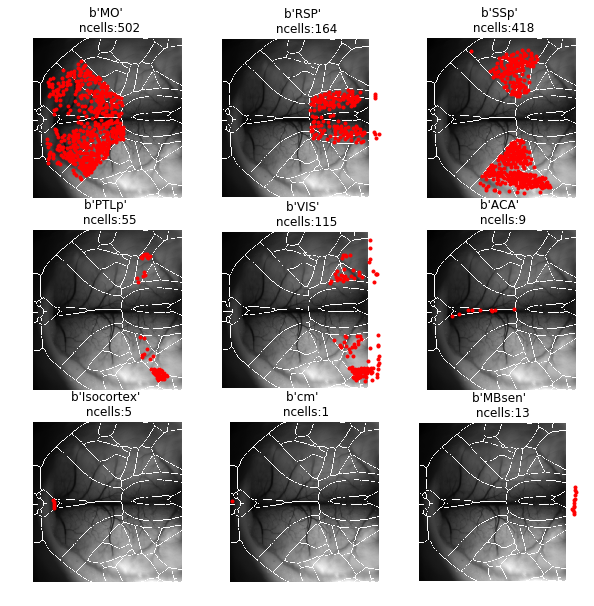

In [6]:
# Load data.
startt = time.time()

CT = CosmosTraces(dataset, do_region_plots=True)
BD = CT.bd

print('Elapsed time: '+str(time.time() - startt))

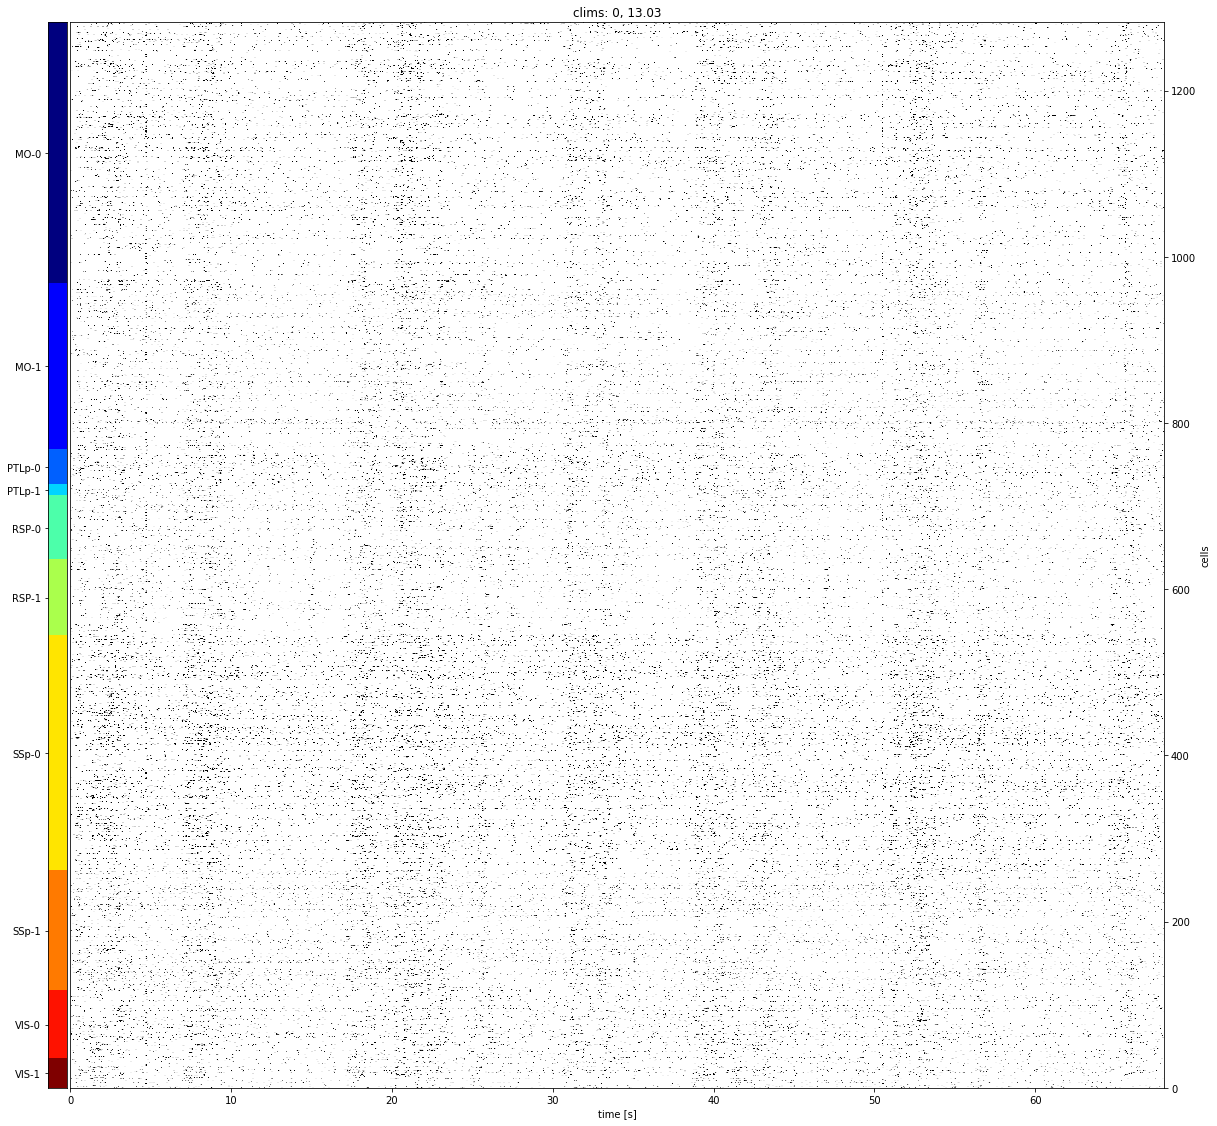

In [7]:
CT.plot_raster_by_region(traces=gaussian_filter1d(CT.S, 0.5, axis=1), 
                         startframe=0, nframes=2000, event_frames=None)
